# Assignment 6: Working with Pandas data frames

In [1]:
%matplotlib inline
%autosave 15

# these next lines make the array and plotting modules available
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

Autosaving every 15 seconds


## The data

* First we will read two data sets from files. 
* The original data is taken from the <a href="https://www.eia.gov/" target="_blank">U.S. Energy Information Administration</a> setup by the U.S. Congress with a mission to _"Collect, analyze, and disseminate independent and impartial energy information to promote sound policymaking, efficient markets, and public understanding of energy and its interaction with the economy and the environment."_
* For this assignment we have made minor data modifications purely for educational purposes.
* If you are interested in this data, you can download the actual data from their <a href="https://www.eia.gov/opendata/bulkfiles.php" target="_blank">latest bulk download site</a>.
* We will be more than happy to help anyone interested in a more thorough scientific look at this data.

### The data sets are:
* `states_co2_pd` is a pandas data frame of size `n`&Cross;`3` where the three columns are the number of million metric tons of $CO_2$ produced by that state from coal, natural gas, and petroleum respectively, and `n` is the number of US states in the dataset.

* `nc_co2_pd` is a pandas data frame of size `m`&Cross;`3` where the three columns are the number of million metric tons of $CO_2$ produced by the state of North Carolina from coal, natural gas, and petroleum respectively, and `m` is number of years of EIA information.

* The two datasets are shown below.

## Read in states data
1. Set variable `states_co2_pd` to a Pandas DataFrame by reading the `states_co2.csv` file.
2. Display the first 5 rows of `states_co2_pd`.

In [2]:
states_co2_pd = pd.read_csv("states_co2.csv")
states_co2_pd.set_index("Unnamed: 0")
states_co2_pd

,Unnamed: 0,coal,natural gas,petroleum
0,Florida,40.242420,75.027273,114.793297
1,Iowa,28.120345,16.828779,28.183284
2,Indiana,89.142017,41.388710,51.322376
3,Alaska,1.563846,17.556345,15.789255
4,Arizona,30.584560,19.711348,36.710043
5,Connecticut,0.220985,13.511039,20.569305
6,Maryland,15.381395,11.325847,30.850718
7,Minnesota,24.662918,24.750139,39.841909
8,Montana,15.290870,4.115340,11.052955
9,New Hampshire,0.498350,3.156553,10.098009


## Q1 coal use

Each state uses different amounts of coal.
 1. Set variable `coal` to the column of `states_co2_pd` that corresponds to coal use.
 1. Find the smallest amount of $CO_2$ emitted by any state in 2016 and assign that to `coal_min`
 1. Find the largest amount of $CO_2$ emitted by any state in 2016 and assign that to `coal_max`
 1. Find the <a href="https://www.mathsisfun.com/definitions/ratio.html" target="_blank">ratio</a> of the state emitting the largest amount of $CO_2$ to the smallest amount (`coal_max:coal_min`) as a real (float) number and assign it to `coal_ratio`.
 
 **NOTE:** A more scientific comparison of the output of $CO_2$ from Indiana and Connecticut should consider the population of each state and make a per capita comparison.

In [3]:
# cell 5 of 25

coal = states_co2_pd["coal"]

display(coal.head(90))

0     40.242420
1     28.120345
2     89.142017
3      1.563846
4     30.584560
5      0.220985
6     15.381395
7     24.662918
8     15.290870
9      0.498350
10     2.902463
11    36.044177
12    68.917226
13     2.516145
14    20.940565
15    33.737180
16    25.399385
Name: coal, dtype: float64

In [4]:
# cell 7 of 25

coal_min = coal.min()

print(type(coal_min))
print('The smallest amount of CO2 emitted by any state in 2016 was', coal_min)

<class 'float'>
The smallest amount of CO2 emitted by any state in 2016 was 0.220985


In [5]:
# cell 9 of 25

coal_max = coal.max()
print('The largest amount of CO2 emitted by any state in 2016 was', coal_max)

The largest amount of CO2 emitted by any state in 2016 was 89.142017


In [6]:
# cell 11 of 25

coal_ratio = round(coal_max/coal_min,3)

print('The ratio of CO2 emitted in 2016 by the state with the largest amount of CO2 to the state with the smallest was', coal_ratio)

The ratio of CO2 emitted in 2016 by the state with the largest amount of CO2 to the state with the smallest was 403.385


# Plotting data

## Q2 Plot each states $CO_2$ emissions by source type

<img src="plot1.png" width="300" style="float: right" />

Similar to variable `coal`,
you may want to create a variable `nat_gas` and `petro` that are copies of the columns in `states_co2`.

Plot a line graph of $CO_2$ emissions by each of the three source types
The graph you produce should look like the figure to the right.
You won't have to put in the title or axis labels as
they have been provided for you.

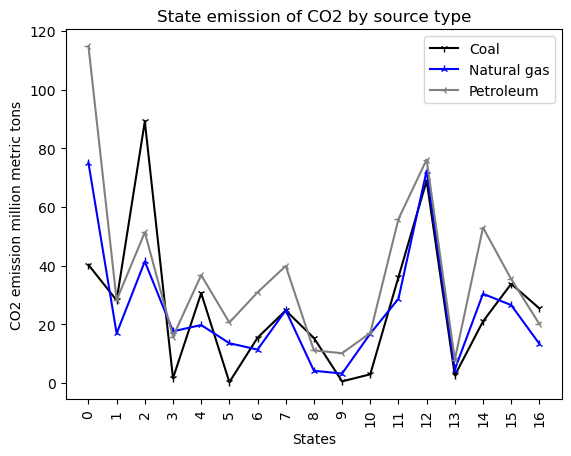

In [7]:
# cell 13 of 25

# First plot the coal line
plt.plot(coal, color='black', marker='1')

# Then natural gas
nat_gas = states_co2_pd['natural gas']
plt.plot(nat_gas, color='blue', marker='2')

# Finally petroleum
petro = states_co2_pd['petroleum']
plt.plot(petro, color='grey', marker='3')

# The following statements show how to label the figure
# DO NOT UPDATE THE FOLLOWING LINES OF CODE!!!!
plt.title('State emission of CO2 by source type')
plt.ylabel('CO2 emission million metric tons')
plt.xlabel('States')
plt.legend(('Coal', 'Natural gas', 'Petroleum'), loc='upper right')
plt.xticks(range(len(states_co2_pd.index)), states_co2_pd.index, rotation='vertical')
q2_graph = plt.gcf()  # DO NOT TOUCH THIS LINE. ENSURE IT'S THE LAST LINE IN THIS CELL

## Q3 Total emission by type

Create a variable `total` that is an array that has each state's sum of its three emission source types


In [8]:
# cell 15 of 25

total = coal + nat_gas + petro

display(total.head(30))

0     230.062990
1      73.132408
2     181.853103
3      34.909446
4      87.005951
5      34.301329
6      57.557960
7      89.254966
8      30.459165
9      13.752912
10     36.651105
11    120.553143
12    217.408711
13     14.995021
14    104.237818
15     95.609028
16     58.761516
dtype: float64

## Q4 Fraction of coal $CO_2$ emission

<img src="plot2.png" width="300" style="float: right" />

For each state, plot the fraction of $CO_2$ emissions that are attributable to coal.

**NOTE** that you will have to put in the label, legend, tick, and title.

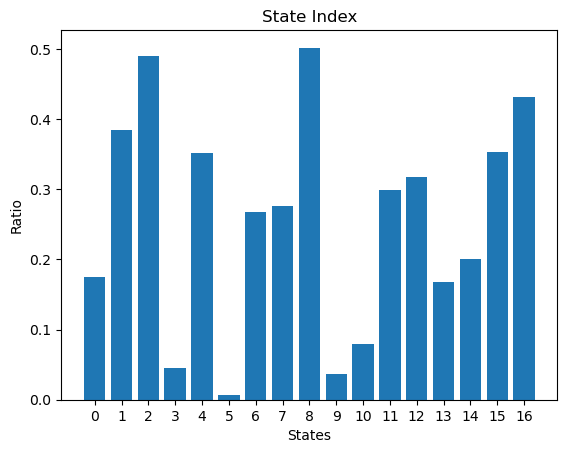

In [9]:
# cell 17 of 25
# Add title, x labels, y labels, and xticks
plt.bar(range(len(states_co2_pd)), coal/total)
#other statements to decorate the plot
plt.title('State Index')
plt.ylabel('Ratio')
plt.xlabel('States')
plt.xticks(range(0,17))
q4_graph = plt.gcf() # DO NOT TOUCH THIS LINE. ENSURE IT'S THE LAST LINE IN THIS CELL

## Q5 Total North Carolina $CO_2$ in chronological order

* Compute the total $CO_2$ produced in North Carolina from coal, natural gas, and petroleum.
* Assign the value to variable `total_nc`.

* Put `total_nc` to be in increasing chronological order.
* In other words, the last element in `total_nc` should be from 2016. The next to last element should be from 2015, etc.


In [10]:
# cell 19 of 25
nc_co2_pd = pd.read_csv("nc_co2.csv")
nc_co2_pd = nc_co2_pd.sort_values('Unnamed: 0')
total_nc = nc_co2_pd['coal'] + nc_co2_pd['natural gas'] + nc_co2_pd['petroleum']
total_nc.name = 'NC Total Emissions'
print(total_nc)

36    112.346916
35    111.861576
34    107.742362
33    107.343971
32    108.807569
31    106.760886
30    112.107540
29    107.298984
28    111.425114
27    115.510696
26    111.113882
25    110.888882
24    121.140638
23    127.082332
22    122.388064
21    128.709154
20    140.647141
19    143.130764
18    142.466784
17    140.780871
16    148.851011
15    143.810536
14    145.333685
13    146.500279
12    149.714438
11    154.028166
10    148.628039
9     154.458804
8     149.198769
7     132.991562
6     143.008967
5     128.624282
4     121.306233
3     125.059373
2     127.375161
1     121.049573
0     120.553143
Name: NC Total Emissions, dtype: float64


## Q6 North Carolina $CO_2$ emmissions

<img src="plot3.png" width="300" style="float: right" />


Using `total_nc`, plot a graph, similar to the graph to the right, that shows North Carolina's total emission of $CO_2$ over the years in increasing chronological order.

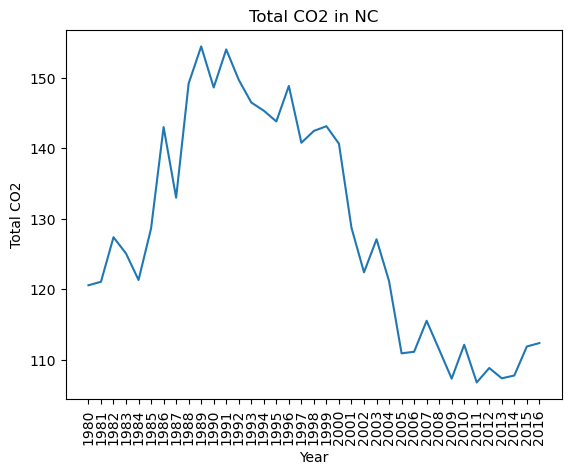

In [11]:
# cell 21 of 25

years_in_order = nc_co2_pd['Unnamed: 0']

plt.plot(total_nc)
plt.title('Total CO2 in NC')
plt.ylabel('Total CO2')
plt.xlabel('Year')
plt.xticks(range(len(years_in_order)), years_in_order, rotation='vertical')

plt.gcf().savefig('plot3.png', bbox_inches='tight')
q6_graph = plt.gcf()  # DO NOT TOUCH THIS LINE. ENSURE IT'S THE LAST LINE IN THIS CELL

## Terminology 

**Change or difference** is simply the second number minus the first number.
The change from 100 to 101 is 1.
The change from 101 to 102 is 1.

**Relative change** is the __change__ divided by the first value. The relative change from 100 to 101 is 0.01.

When we're talking about multiple years, use the terms above applied to each pair of years.
Consider the values `[1, 2, 1, 4]`.

* The __change__ is `[1, -1, 3]`,
* The __relative change__ is `[1/1, -1/2, 3/1]` or `[1.0, -0.5, 3.0]`.

## Q7 Relative change in $CO_2$

<img src="plot4.png" width="300" style="float: right" />

 1. Plot the relative change in North Carolina's total $CO_2$ emissions.
    The plot should appear similar to the graph at the right.
    - A negative relative change for any year implies a decrease in $CO_2$ emmissions
    - You may want to print out the numbers so that you understand to help you understand the data!!!
 1. Add a red line at 0 height to facilitate knowing positive relative change versus negative relative change
 1. Compute the minimum, maximum, and average relative change in North Carolina's total $CO_2$ emissions.
 1. How many years had negative relative change from the previous year?
 1. How many years had non-negative relative change?

Again, since you will be doing multiple computations, you may want to print out your results at each step.

The maximum, minimum, and average relative change is 0.12186643089431502 -0.08487898804853766 -0.0008241111417034836
18 years had increases (positive relative change) in CO2 emissions in North Carolina.
18 years had decreases (negative relative change) in CO2 emissions in North Carolina.


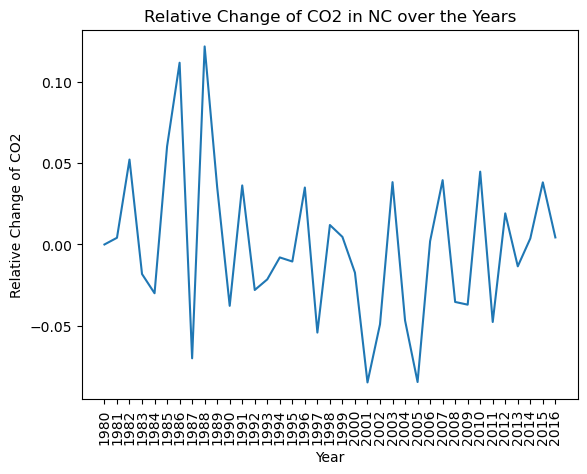

In [12]:
# cell 23 of 25

relative_difference = [(total_nc[year] - total_nc[year-1]) / total_nc[year-1] for year in range(1, len(total_nc))]
relative_difference = [0] + relative_difference
#print(total_nc)
#print(relative_difference)
nc_max = max(relative_difference)
nc_min = min(relative_difference)
nc_avg = sum(relative_difference) / len(relative_difference)

nc_neg = sum(1 for x in relative_difference if x < 0)
nc_pos = sum(1 for x in relative_difference if x > 0)

plt.plot(relative_difference)
# add the x and y label
# add the title 
# add the xticks
plt.title('Relative Change of CO2 in NC over the Years')
plt.ylabel('Relative Change of CO2')
plt.xlabel('Year')
plt.xticks(range(len(years_in_order)), years_in_order, rotation='vertical')

print('The maximum, minimum, and average relative change is', nc_max, nc_min, nc_avg)
print(nc_neg, 'years had increases (positive relative change) in CO2 emissions in North Carolina.')
print(nc_pos, 'years had decreases (negative relative change) in CO2 emissions in North Carolina.')
q7_graph = plt.gcf()  # DO NOT TOUCH THIS LINE. ENSURE IT'S THE LAST LINE IN THIS CELL

## Done!
<img src="restartAndClearOutput.png" width="300" style="float: right" />

Now go back, restart the kernel (menu <font color="green">Kernel</font>-><font color="green">Restart and Clear</font>), and then Shift-Enter your way through the notebook to run all the cells again so you an be sure all your code will work as you expect during grading.

## Saving your work
<img src="saveAndCheckpoint.png" width="300" style="float: right" />

Now save your work by going to (menu <font color='green'>File</font>-><font color='green'>Save and Checkpoint</font>)

## Close this notebook and then go back to the AssignmentUnlocker
<img src="closeAndHalt.png" width="300" style="float: right" />

Before going back to the AssignmentUnlocker and submit your work, you'll need to go close this
notebook (menu <font color='green'>File</font>-><font color='green'>Close and Halt</font>.)


Note that if you actually saved your work you should not see the leaving site message below.
If you do see the `Leave Site` warning, cancel and save your work again.
<br />
<img src="leaveSite.png" width="300" style="float: left" />